In [2]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

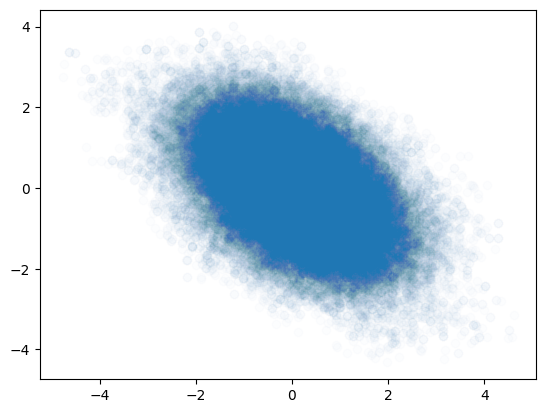

In [39]:
nan = np.nan
exp = np.exp


@njit
def run(K=10_000, step_x=0.5, step_y=0.5):
    x = np.full(K, nan)
    x[0] = 0
    y = np.full(K, nan)
    y[0] = 0
    accept = np.full(K, False)
    dx = np.random.rand(K)
    dy = np.random.rand(K)
    metro = np.random.rand(K)
    init = np.full(K, nan)
    fin = np.full(K, nan)

    for k in range(1, K):
        init[k] = 0.5 * (x[k - 1] ** 2 + y[k - 1] ** 2 + x[k - 1] * y[k - 1])
        x[k] = x[k - 1] + (dx[k] - 0.5) * step_x * 2.0
        y[k] = y[k - 1] + (dy[k] - 0.5) * step_y * 2.0
        fin[k] = 0.5 * (x[k] ** 2 + y[k] ** 2 + x[k] * y[k])
        accept[k] = exp(init[k] - fin[k]) > metro[k]
        x[k] = x[k] if accept[k] else x[k - 1]
        y[k] = y[k] if accept[k] else y[k - 1]

    return accept.sum() / K, (x, y)


a, [x, y] = run(K=100_000)

plt.scatter(x, y, alpha=0.01)